In [1]:
#ANEXO: (https://github.com/st4rck19981/TOPDataScience/tree/main/Evaluacion1)

import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
data=pd.read_csv('tmdb-movies.csv')
data.shape

(10866, 21)

In [114]:
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [115]:
data['keywords'].head(3)

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
Name: keywords, dtype: object

In [116]:
data.isnull().any()
#false si no tiene valores nulos, true si tuviera valores null

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [117]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Popularidad  6.500000000000001e-05 - 32.985763


<ipython-input-118-bc957ce1607f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date']=pd.to_datetime(df['release_date'])


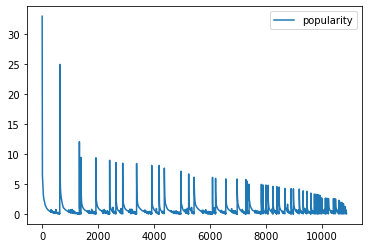

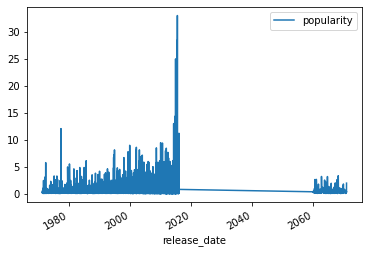

In [118]:
#GRAFICO: por POPULARIDAD por RELEASE_DATE
df=data[['popularity','original_title','release_date']]
df.plot(y='popularity',kind='line')

df['release_date']=pd.to_datetime(df['release_date'])
df=df.sort_values(by=['release_date'])
df.plot(x='release_date',y='popularity',kind='line')

print('Popularidad ',df['popularity'].min(),'-',df['popularity'].max())
#plt.show()

Popularidad  0.304112 - 1.0306567551669303


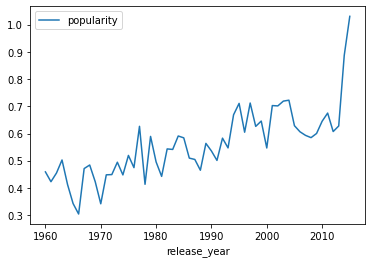

In [119]:
#GRAFICO: por POPULARIDAD por ANO
dfa=data.groupby('release_year').mean()
dfa.plot(y='popularity',kind='line')

print('Popularidad ',dfa['popularity'].min(),'-',dfa['popularity'].max())
#plt.show()

Fecha  1971-01-15 00:00:00 - 2070-12-24 00:00:00
Promedio  1.5 - 9.2


<ipython-input-87-9dc301961357>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date']=pd.to_datetime(df['release_date'])


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10648,10112,tt0065421,1.936962,4000000,55675257,The Aristocats,Phil Harris|Sterling Holloway|Scatman Crothers...,NaN,Wolfgang Reitherman,A tune-filled animated extravaganza.,...,When Madame Adelaide Bonfamille leaves her for...,78,Animation|Comedy|Family|Adventure,Walt Disney Productions,12/24/70,625,7.0,1970,2.246547e+07,3.126928e+08


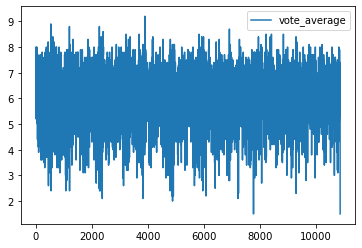

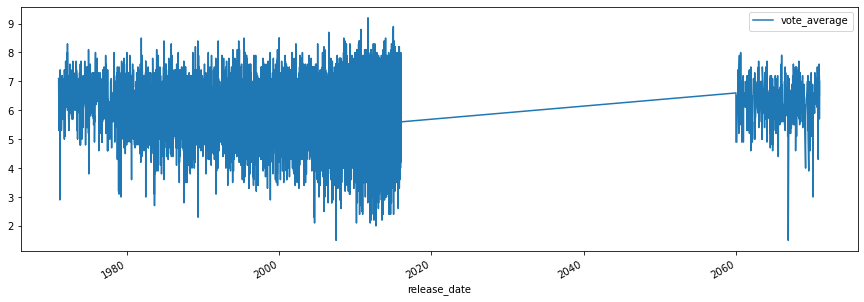

In [87]:
#GRAFICO: por PROMEDIO de votos X RELEASE_TIME
df=data[['vote_average','original_title','release_date']]
df.plot(y='vote_average',kind='line')

df['release_date']=pd.to_datetime(df['release_date'])
df=df.sort_values(by=['release_date'])

df.plot(x='release_date',y='vote_average',kind='line',figsize=(15,5))
df.tail(5)

print('Fecha ',df['release_date'].min(),'-',df['release_date'].max())
print('Promedio ',df['vote_average'].min(),'-',df['vote_average'].max())
data[data['original_title']=='The Aristocats']
#plt.show()

PROMEDIO DE VOTOS  5.799829931972789 - 6.703636363636363
VOTOS  1.5 - 9.2


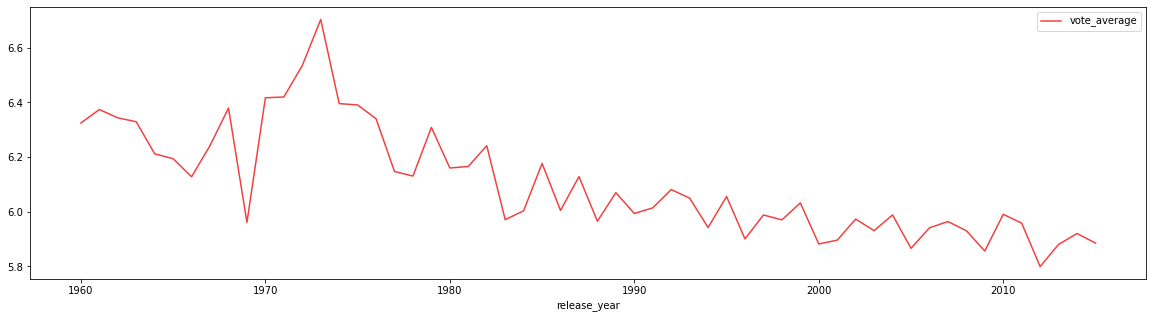

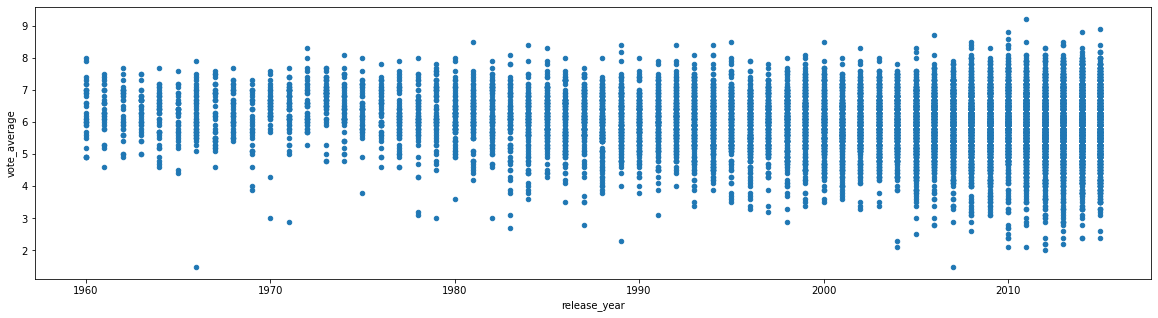

In [110]:
#PROMEDIO DE VOTOS X ANO
df=data.groupby('release_year').mean()
df.plot(y='vote_average',kind='line',color='#F14040',figsize=(20,5))
print('PROMEDIO DE VOTOS ',df['vote_average'].min(),'-',df['vote_average'].max())

df=data.sort_values(by=['release_year'])
df.plot(x='release_year',y='vote_average',kind='scatter',figsize=(20,5))
print('VOTOS ',df['vote_average'].min(),'-',df['vote_average'].max())
plt.show()

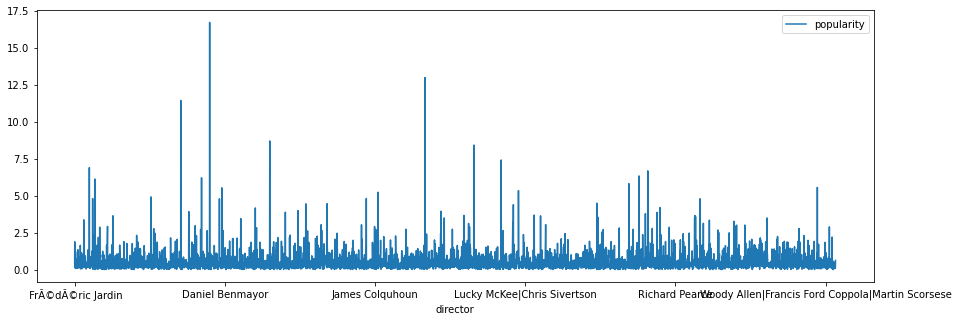

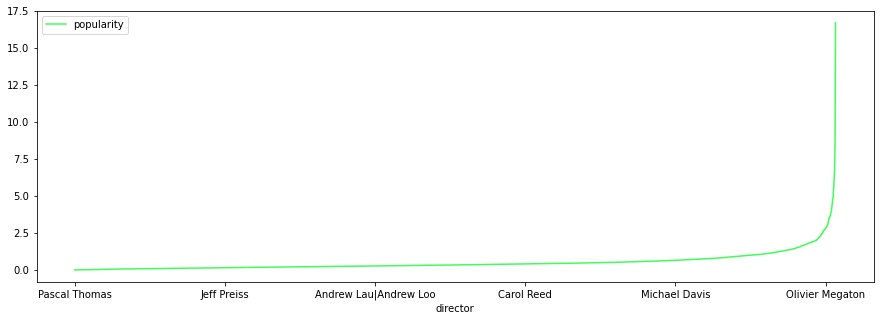

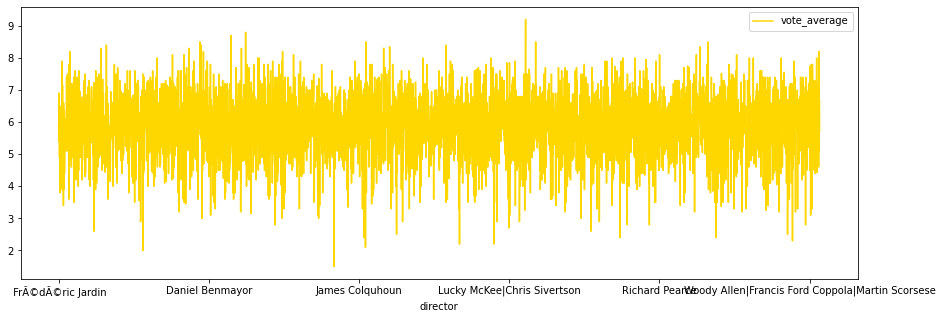

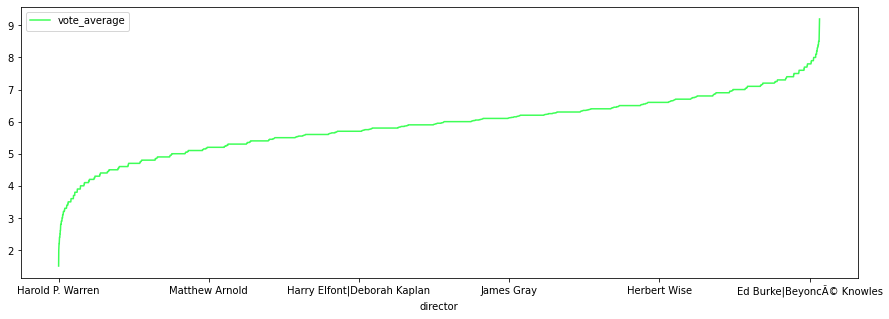

In [94]:
#MOSTRAR RATING DE LOS PRODUCTORES
dfa=data.groupby('director').mean()

dfa.plot(y='popularity',kind='line',figsize=(15,5))
df=dfa.sort_values(by=['popularity'])
df.plot(y='popularity',kind='line',figsize=(15,5),color='#3EFE57')


dfa.plot(y='vote_average',kind='line',figsize=(15,5),color='#FFD700')
df=dfa.sort_values(by=['vote_average'])
df.plot(y='vote_average',kind='line',figsize=(15,5),color='#3EFE57')

plt.show()

<AxesSubplot:xlabel='vote_count', ylabel='popularity'>

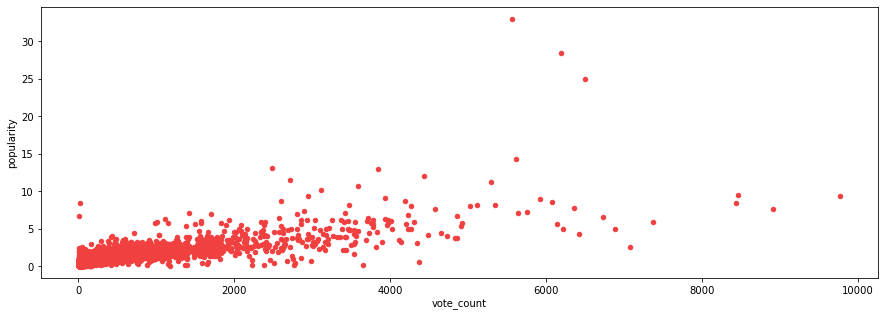

In [96]:
#RELACION DEL VOTE COUNT CON LA POPULARIDAD DE CADA PELICULA
df=data[['popularity','vote_count']]
df.plot(x='vote_count',y='popularity',kind='scatter',color='#F14040',figsize=(15,5))

In [20]:
#PREGUNTA 1 DEL EXAMEN
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Media de popularidad:  1.0663249687499994
                       original_title  vote_average  popularity
9                          Inside Out           8.0    6.326804
24                      The Big Short           7.3    4.648046
27       Kingsman: The Secret Service           7.6    4.503789
51                         The Intern           7.1    2.814802
75     Me and Earl and the Dying Girl           7.7    2.141506
113                              Dope           7.3    1.408050
635                        Big Hero 6           7.8    8.691294
663        How to Train Your Dragon 2           7.7    3.489106
666                    The Lego Movie           7.5    3.327799
678                        Paddington           7.1    2.721864
680                              Chef           7.2    2.672350
727                       St. Vincent           7.1    1.542392
1390                               Up           7.6    4.908902
1395             (500) Days of Summer           7.3    3.24413

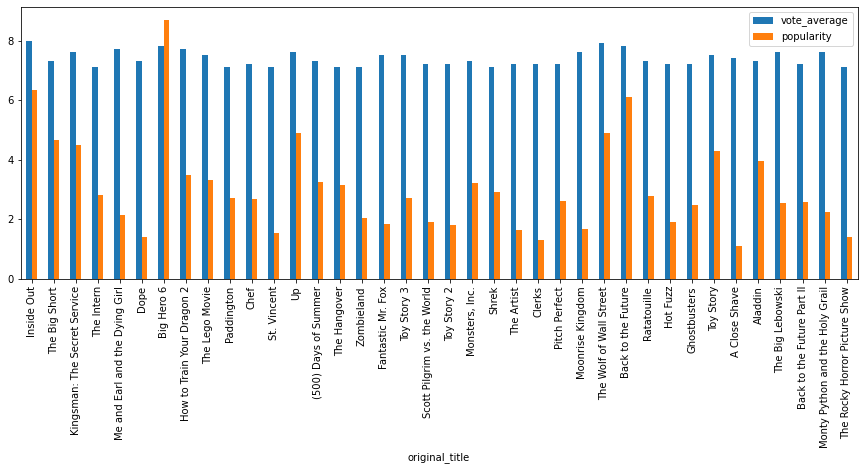

In [44]:
df=data.dropna()
df=df[df['genres'].str.contains("Comedy")]
mediapop=df['popularity'].mean()
print("Media de popularidad: ",mediapop)
#mediapop=4
mediavot=7.0
df=df[df['popularity']>mediapop]
df=df[df['vote_average']>mediavot]
df.plot(x='original_title',y=['vote_average','popularity'],kind='bar',figsize=(15,5))

print(df[['original_title','vote_average','popularity']])

Media de popularidad:  0.9566555999999998


<AxesSubplot:xlabel='original_title'>

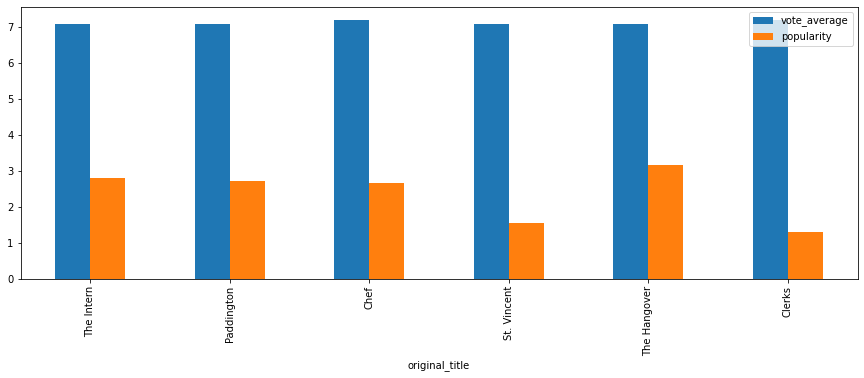

In [26]:
df=data.dropna()
df=df[df['genres']=='Comedy']
mediapop=df['popularity'].mean()
print("Media de popularidad: ",mediapop)
#mediapop=4
mediavot=7.0
df=df[df['popularity']>mediapop]
df=df[df['vote_average']>mediavot]
df.plot(x='original_title',y=['vote_average','popularity'],kind='bar',figsize=(15,5))
#print(df)

In [49]:
#peliculas con mayores ingresos = mayor rentabilidad?
#rentabilidad = revenue - budget
#revenue=ingresos
#budget=budget_adj
#dfa.sort_values(by=['popularity'])
#by_year = planets.sort_values('year',ascending=False)

dg=data.dropna()
dg=data.sort_values('revenue',ascending=False)
dg['rentabilidad']=dg['revenue']-dg['budget']
dg.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rentabilidad
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188


<AxesSubplot:xlabel='revenue', ylabel='rentabilidad'>

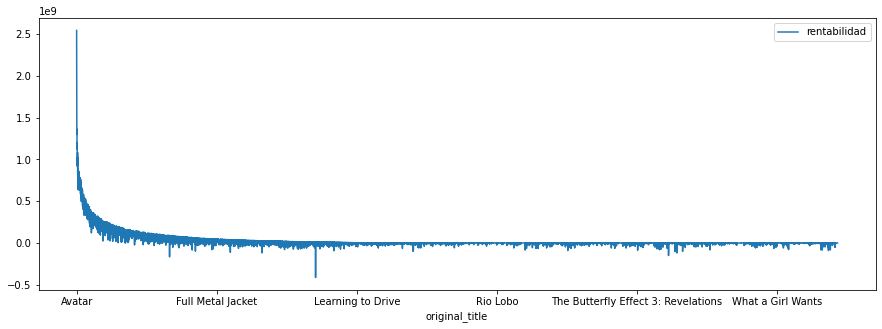

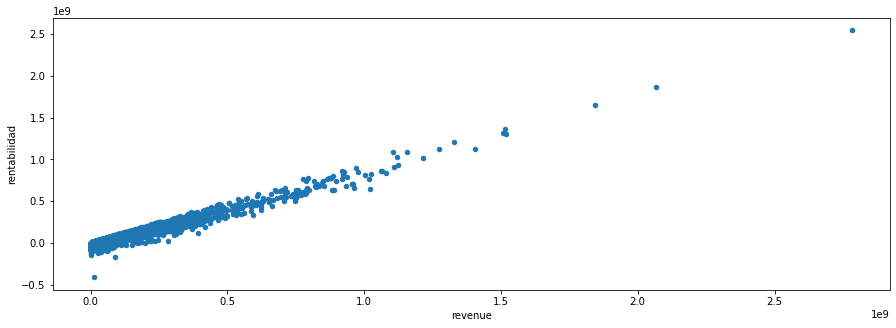

In [51]:
#dg.plot(x='revenue',y='budget',kind='scatter',figsize=(15,5))
dg.plot(x='original_title',y='rentabilidad',kind='line',figsize=(15,5))
dg.plot(x='revenue',y='rentabilidad',kind='scatter',figsize=(15,5))